<h1> <b> Fake Job Description Prediction </b> </h1>

[Real or Fake] : Fake Job Description Prediction
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

Acknowledgements
The University of the Aegean | Laboratory of Information & Communication Systems Security
http://emscad.samos.aegean.gr/

Inspiration
The dataset is very valuable as it can be used to answer the following questions:

Create a classification model that uses text data features and meta-features and predict which job description are fraudulent or real.
Identify key traits/features (words, entities, phrases) of job descriptions which are fraudulent in nature.
Run a contextual embedding model to identify the most similar job descriptions.
Perform Exploratory Data Analysis on the dataset to identify interesting insights from this dataset.


**<h2> About Fake Job Prediction Dataset </h2>**


The `fake_job_posting.csv` data set provided by Shivam Bansal contains the following features:

Feature | Description 
----------|---------------
**`job_id`** | A unique identifier for posted job.    
**`title`**    | Title of Posted Job. 
**`location`** |  Where the person is located.  
 **`department`** | Which department a person is belonging  
  **`salary_range`** | A person whose salary is between given range
**`company_profile`** | Company Details  
**`description`** | Description of Company 
 **`requirements`**    | Requirement for particular job  
**`benefits`**    | What are the benefits for particular job 
**`telecommunicating`**    | Company having facility of telecommunicating 
**`has_company_logo`**    | company is having logo or not
**`has_questions`** | Company has questions for particular job
**`employment_type`** | Employment type   
**`required_experience`** | Required experience   
**`required_education`** | Required education 
**`industry`** | job is related to which industry 
**`function`** | For which area job requirement is posted 
**`fraudulent`** | Wheither job is fake or real


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/533871%2F976879%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592576796&Signature=QNrntzIcmEHuTnPytDChP6r5iczwYoRd%2BK3GBEm%2BMD0tQJym7K3dEoAPxUSfFZcnWNbRl0adUmrvTBz9%2FCna2yi4a5eolmm4faBFB1Ly%2FbhBjx7bvxnNva1UH8n1Gu9up%2BIQZxpkR4gz3kZCVq2qdrtsqtakMLxuC4CmzmPZCkySufZILOtask5DJrM%2FabBUvCx%2BIJuBtWUEsiYjLzSBnk87imbGuTI54MlH9a4KJKG3Sl4qMxT7YDW01LSeVXkLntbpp9N76vJQxIzOlTyAmYsofOQTpUYCaQ%2FzGUDT84z0xYmpDQnHpnixDcp7Fv%2Fx3wTCs9%2F37jLNVIaC5DAbfw%3D%3D" -c -O '533871_976879_bundle_archive.zip'

--2020-06-16 16:15:33--  https://storage.googleapis.com/kaggle-data-sets/533871%2F976879%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592576796&Signature=QNrntzIcmEHuTnPytDChP6r5iczwYoRd%2BK3GBEm%2BMD0tQJym7K3dEoAPxUSfFZcnWNbRl0adUmrvTBz9%2FCna2yi4a5eolmm4faBFB1Ly%2FbhBjx7bvxnNva1UH8n1Gu9up%2BIQZxpkR4gz3kZCVq2qdrtsqtakMLxuC4CmzmPZCkySufZILOtask5DJrM%2FabBUvCx%2BIJuBtWUEsiYjLzSBnk87imbGuTI54MlH9a4KJKG3Sl4qMxT7YDW01LSeVXkLntbpp9N76vJQxIzOlTyAmYsofOQTpUYCaQ%2FzGUDT84z0xYmpDQnHpnixDcp7Fv%2Fx3wTCs9%2F37jLNVIaC5DAbfw%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16868281 (16M) [application/zip]
Saving to: ‘533871_976879_bundle_archive.zip’

533871_976879_bundl 100%[===================>]  16.09M  25.3MB/s    in 0.6s    

2020-06-

In [ ]:
!unzip 533871_976879_bundle_archive.zip

Archive:  533871_976879_bundle_archive.zip
  inflating: fake_job_postings.csv   


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


In [ ]:
import pandas as pd
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('fake_job_postings.csv')

In [ ]:
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


Number of Jobs that are Fake Jobs  866 , ( 4.8434004474272925 %)
Number of Jobs that are Real 17014 , ( 95.1565995525727 %)


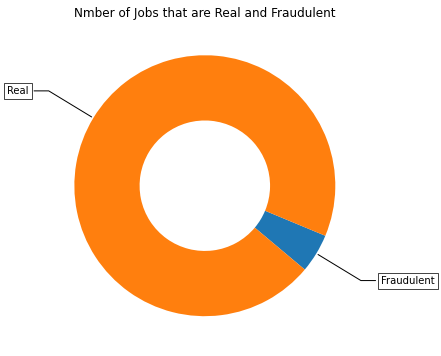

In [ ]:
# PROVIDE CITATIONS TO YOUR CODE IF YOU TAKE IT FROM ANOTHER WEBSITE.
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
y_value_counts = df['fraudulent'].value_counts()

print("Number of Jobs that are Fake Jobs ", y_value_counts[1], ", (", float(y_value_counts[1]/float(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of Jobs that are Real", y_value_counts[0], ", (", float(y_value_counts[0]/float(y_value_counts[1]+y_value_counts[0]))*100,"%)")


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Fraudulent", "Real"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of Jobs that are Real and Fraudulent")

plt.show()

<h2> <b>Observation :</b></h2>
There is 95% jobs are Real and around 5% are fake jobs. <br>
Dataset is imbalance 

In [ ]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='fraudulent', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Jobs')
    plt.title('Number of Jobs Real vs fake')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'Fake'))
    plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='fraudulent', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg(total='count')).reset_index()['total']

    temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

In [ ]:
#univariate_barplots(df, 'department', 'fraudulent', False)
col1='department'
col2='fraudulent'
temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg(total='count')).reset_index()['total']
temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']    
temp.sort_values(by=['total'],inplace=True, ascending=False)
print(temp.head(5))
print("="*50)
print(temp.tail(5))    

       department  fraudulent  total       Avg
1054        Sales          12    551  0.021779
434   Engineering          46    487  0.094456
758     Marketing           2    401  0.004988
859    Operations           0    270  0.000000
626            IT           1    225  0.004444
                 department  fraudulent  total  Avg
554   Greetsnap Development           0      1  0.0
555          Grocery Stores           0      1  0.0
558                    H3rt           0      1  0.0
559             HEADQUATERS           1      1  1.0
1336            ΠΛΗΡΟΦΟΡΙΚΗ           0      1  0.0


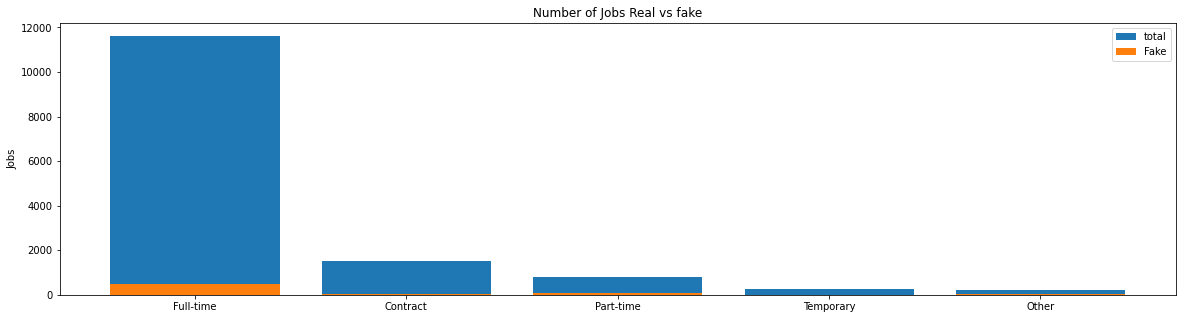

  employment_type  fraudulent  total       Avg
1       Full-time         490  11620  0.042169
0        Contract          44   1524  0.028871
3       Part-time          74    797  0.092848
4       Temporary           2    241  0.008299
2           Other          15    227  0.066079
  employment_type  fraudulent  total       Avg
1       Full-time         490  11620  0.042169
0        Contract          44   1524  0.028871
3       Part-time          74    797  0.092848
4       Temporary           2    241  0.008299
2           Other          15    227  0.066079


In [ ]:
univariate_barplots(df, 'employment_type', 'fraudulent', False)

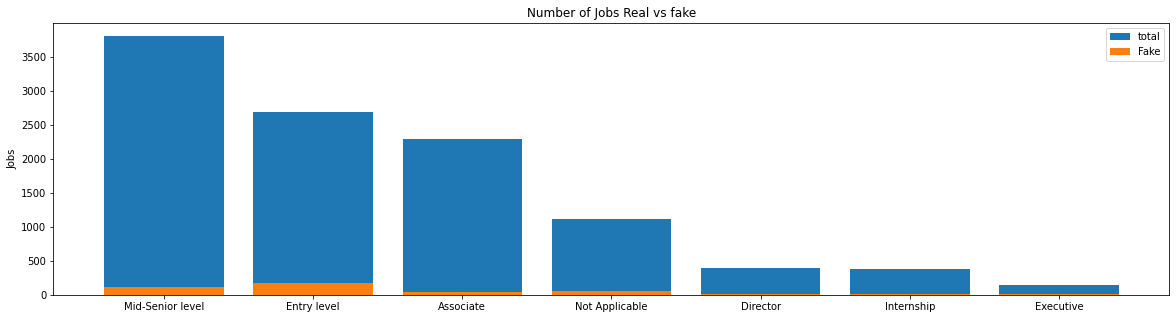

  required_experience  fraudulent  total       Avg
5    Mid-Senior level         113   3809  0.029667
2         Entry level         179   2697  0.066370
0           Associate          42   2297  0.018285
6      Not Applicable          60   1116  0.053763
1            Director          17    389  0.043702
  required_experience  fraudulent  total       Avg
0           Associate          42   2297  0.018285
6      Not Applicable          60   1116  0.053763
1            Director          17    389  0.043702
4          Internship          10    381  0.026247
3           Executive          10    141  0.070922


In [ ]:
univariate_barplots(df, 'required_experience', 'fraudulent', False)

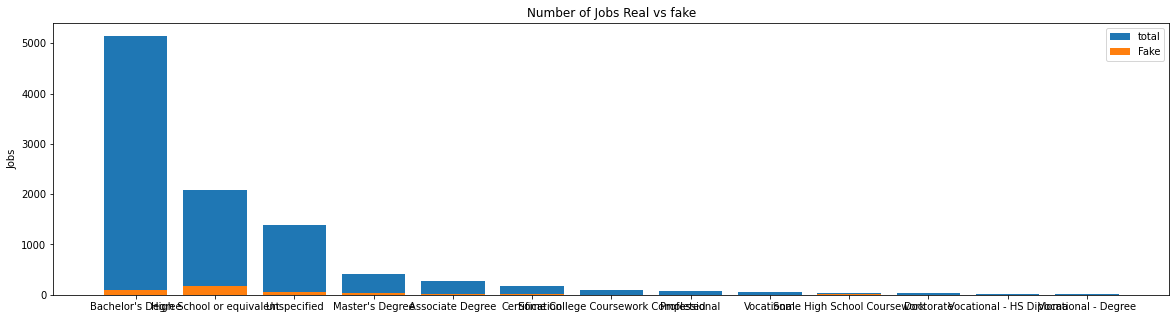

          required_education  fraudulent  total       Avg
1          Bachelor's Degree         100   5145  0.019436
4  High School or equivalent         170   2080  0.081731
9                Unspecified          61   1397  0.043665
5            Master's Degree          31    416  0.074519
0           Associate Degree           6    274  0.021898
             required_education  fraudulent  total       Avg
10                   Vocational           0     49  0.000000
8   Some High School Coursework          20     27  0.740741
3                     Doctorate           1     26  0.038462
12      Vocational - HS Diploma           0      9  0.000000
11          Vocational - Degree           0      6  0.000000


In [ ]:
univariate_barplots(df, 'required_education', 'fraudulent', False)

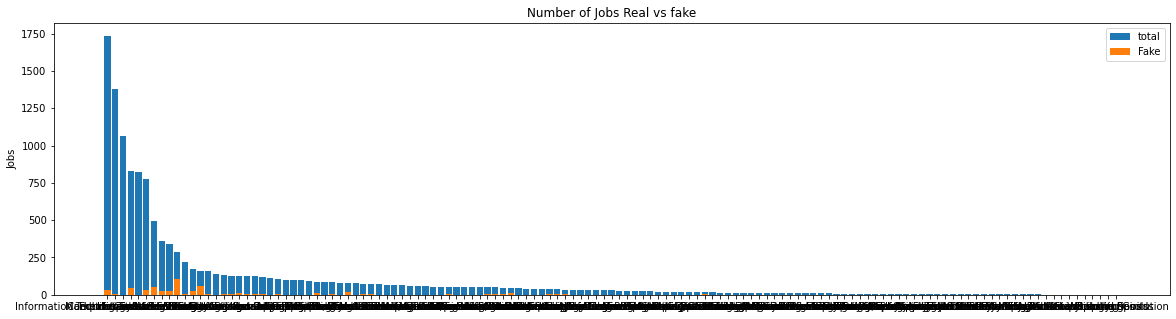

                               industry  fraudulent  total       Avg
58  Information Technology and Services          32   1734  0.018454
22                    Computer Software           5   1376  0.003634
61                             Internet           0   1062  0.000000
75            Marketing and Advertising          45    828  0.054348
31                 Education Management           0    822  0.000000
                           industry  fraudulent  total  Avg
115                    Shipbuilding           0      1  0.0
2    Alternative Dispute Resolution           0      1  0.0
106                        Ranching           1      1  1.0
128                Wine and Spirits           0      1  0.0
116                  Sporting Goods           0      1  0.0


In [ ]:
univariate_barplots(df, 'industry', 'fraudulent', False)

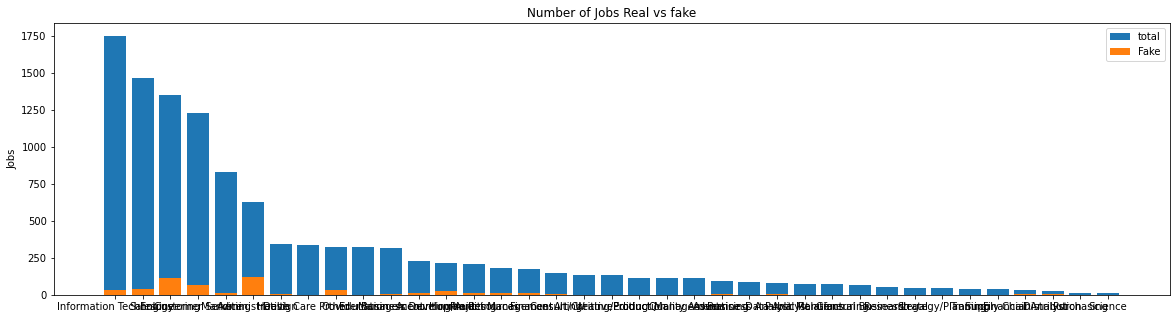

                  function  fraudulent  total       Avg
18  Information Technology          32   1749  0.018296
31                   Sales          41   1468  0.027929
12             Engineering         113   1348  0.083828
7         Customer Service          67   1229  0.054516
22               Marketing          10    830  0.012048
             function  fraudulent  total       Avg
34       Supply Chain           0     36  0.000000
14  Financial Analyst           5     33  0.151515
10       Distribution           3     24  0.125000
28         Purchasing           0     15  0.000000
32            Science           0     14  0.000000


In [ ]:
univariate_barplots(df, 'function', 'fraudulent', False)

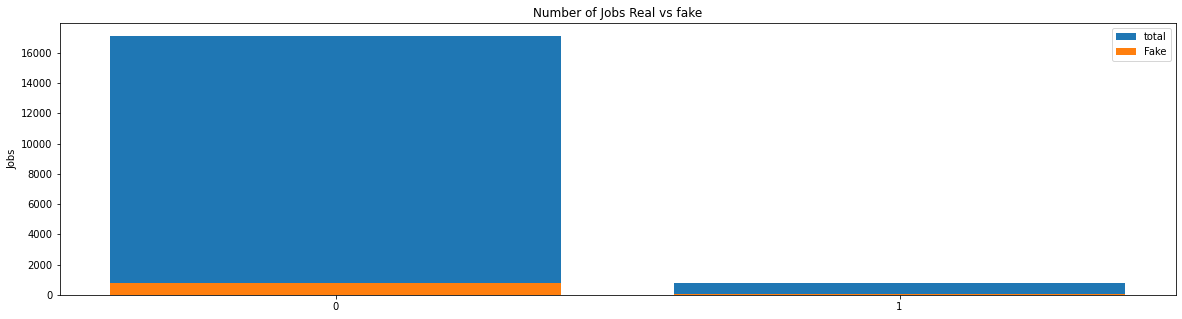

   telecommuting  fraudulent  total       Avg
0              0         802  17113  0.046865
1              1          64    767  0.083442
   telecommuting  fraudulent  total       Avg
0              0         802  17113  0.046865
1              1          64    767  0.083442


In [ ]:
univariate_barplots(df, 'telecommuting', 'fraudulent', False)

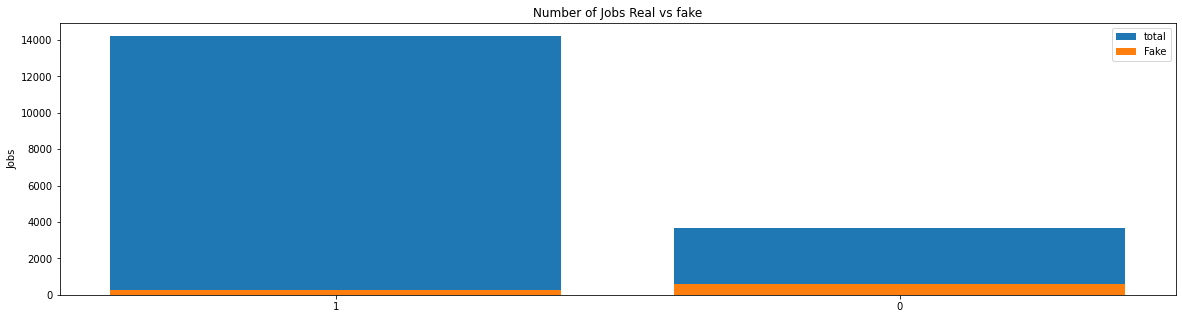

   has_company_logo  fraudulent  total       Avg
1                 1         283  14220  0.019902
0                 0         583   3660  0.159290
   has_company_logo  fraudulent  total       Avg
1                 1         283  14220  0.019902
0                 0         583   3660  0.159290


In [ ]:
univariate_barplots(df, 'has_company_logo', 'fraudulent', False)

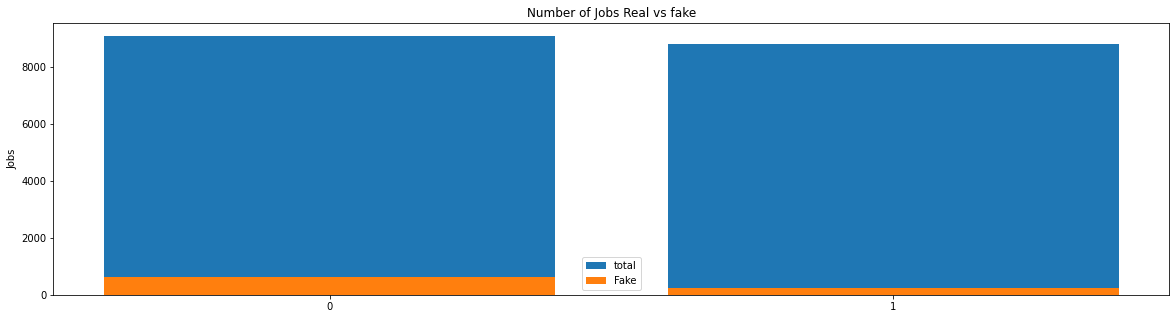

   has_questions  fraudulent  total       Avg
0              0         616   9088  0.067782
1              1         250   8792  0.028435
   has_questions  fraudulent  total       Avg
0              0         616   9088  0.067782
1              1         250   8792  0.028435


In [ ]:
univariate_barplots(df, 'has_questions', 'fraudulent', False)

<h2> <b> Observation</b> </h2><br>
This Univariate Anlaysis shows that the in the particular features which is top 5 rows in that how much is fake job posting out of total .

<ul>
<li>This Shows the top 5 rows of all the features</li>
<li>Also list of how much is fake job out of total</li>
</ul>

###Missing values in dataset

In [ ]:
#Missing values in dataset


for col in df.columns:
    nullrow=df[col].isnull().sum()
    notrow=df[col].notnull().sum()
    percentage=(nullrow*100)/(nullrow+notrow)
    if percentage > 30 :
        print("Column is ",col,percentage,"% Missing Values")
    
    

Column is  department 64.58053691275168 % Missing Values
Column is  salary_range 83.95973154362416 % Missing Values
Column is  benefits 40.324384787472034 % Missing Values
Column is  required_experience 39.42953020134228 % Missing Values
Column is  required_education 45.32997762863535 % Missing Values
Column is  function 36.10178970917226 % Missing Values


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
## We drop columns which is having more than 40% data is missings

col=['department','required_education','salary_range']
df.drop(col,axis=1,inplace=True)
df.head(2)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Marketing and Advertising,Customer Service,0


In [ ]:
# Remaining columns is fill up with the top occuring value
for col in df.columns:
    df[col] = df[col].fillna(df[col].value_counts().index[0])


In [ ]:
df.head(2)

,job_id,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Marketing and Advertising,Customer Service,0


## Data Preprocessing

In [ ]:
print(df['title'].values[50])
print('*'*100)
print(df['title'].values[100])
print('*'*100)
print(df['title'].values[150])
print('*'*100)
print(df['title'].values[250])
print('*'*100)
print(df['title'].values[5000])
print('*'*100)


Food Production Manager @ PGI, a Food Production Company
****************************************************************************************************
CAD Operator
****************************************************************************************************
Web Developer
****************************************************************************************************
Helpdesk Specialist
****************************************************************************************************
Partner Integration Engineer - Gatcha!
****************************************************************************************************


In [ ]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for title in tqdm(df['title'].values):
    t = decontracted(title)
    t = t.replace('\\r', ' ')
   
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_title.append(t.lower().strip())

100%|██████████| 17880/17880 [00:00<00:00, 50774.24it/s]


In [ ]:
df.drop(['title'],axis=1,inplace=True)
df['preprocessed_title']=preprocessed_title
df.head(2)

,job_id,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,industry,function,fraudulent,preprocessed_title
0,1,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Information Technology and Services,Marketing,0,marketing intern
1,2,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Marketing and Advertising,Customer Service,0,customer service cloud video production


In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_location = []
# tqdm is for printing the status bar
for location in tqdm(df['location'].values):
    t = decontracted(location)
    t = t.replace('\\r', ' ')
   
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_location.append(t.lower().strip())
    
df.drop(['location'],axis=1,inplace=True)
df['preprocessed_location']=preprocessed_location
df.head(2)

100%|██████████| 17880/17880 [00:00<00:00, 56514.23it/s]


,job_id,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,industry,function,fraudulent,preprocessed_title,preprocessed_location
0,1,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Information Technology and Services,Marketing,0,marketing intern,us ny new york
1,2,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Marketing and Advertising,Customer Service,0,customer service cloud video production,nz auckland


In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_company_profile = []
# tqdm is for printing the status bar
for company in tqdm(df['company_profile'].values):
    t = decontracted(company)
    t = t.replace('\\r', ' ')
    
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_company_profile.append(t.lower().strip())
    
df.drop(['company_profile'],axis=1,inplace=True)
df['preprocessed_company_profile']=preprocessed_company_profile
df.head(2)

100%|██████████| 17880/17880 [00:03<00:00, 4471.87it/s]


,job_id,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,industry,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile
0,1,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Information Technology and Services,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...
1,2,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Marketing and Advertising,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...


In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_industry = []
# tqdm is for printing the status bar
for company in tqdm(df['industry'].values):
    t = decontracted(company)
    t = t.replace('\\r', ' ')
    
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_industry.append(t.lower().strip())
    
df.drop(['industry'],axis=1,inplace=True)
df['preprocessed_industry']=preprocessed_industry
df.head(2)

100%|██████████| 17880/17880 [00:00<00:00, 61819.49it/s]


,job_id,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry
0,1,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...,information technology services
1,2,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...,marketing advertising


In [ ]:
df['text']=df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
df.drop(['description','requirements','benefits'],axis=1,inplace=True)
df.head(2)

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry,text
0,1,0,1,0,Other,Internship,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...,information technology services,"Food52, a fast-growing, James Beard Award-winn..."
1,2,0,1,0,Full-time,Not Applicable,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...,marketing advertising,Organised - Focused - Vibrant - Awesome!Do you...


In [ ]:
df.drop(['job_id'],axis=1,inplace=True)
df.head(2)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry,text
0,0,1,0,Other,Internship,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...,information technology services,"Food52, a fast-growing, James Beard Award-winn..."
1,0,1,0,Full-time,Not Applicable,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...,marketing advertising,Organised - Focused - Vibrant - Awesome!Do you...


In [ ]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for company in tqdm(df['text'].values):
    t = decontracted(company)
    t = t.replace('\\r', ' ')
    
    t = t.replace('\\"', ' ')
    t = t.replace('-','_')
    t = t.replace('\\n', ' ')
    t = re.sub('[^A-Za-z0-9]+', ' ',t)
    # https://gist.github.com/sebleier/554280
    t = ' '.join(e for e in t.split() if e not in stopwords)
    preprocessed_text.append(t.lower().strip())
    
df.drop(['text'],axis=1,inplace=True)
df['preprocessed_text']=preprocessed_text
df.head(2)

100%|██████████| 17880/17880 [00:11<00:00, 1513.59it/s]


,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry,preprocessed_text
0,0,1,0,Other,Internship,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...,information technology services,food52 fast growing james beard award winning ...
1,0,1,0,Full-time,Not Applicable,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...,marketing advertising,organised focused vibrant awesome do passion c...


# Categorical Data

In [ ]:

y=df['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)
#X_train,X_cv,y_train,y_cv=train_test_split(x_train,Y_train,test_size=0.2)
print(X_train.shape, y_train.shape)
#print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)


(12516, 12) (12516,)
(5364, 12) (5364,)


In [ ]:
#One hot encoding of Employment_type
col='employment_type'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_employment_type=list(X_train[col].unique())

vectorizer_col = CountVectorizer(vocabulary=train_employment_type, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_employment_type_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_employment_type_one_hot.shape)
#For Cross validating data
#cv_state_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_state_one_hot.shape)

  # For testing data 
test_employment_type_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_employment_type_one_hot.shape)

['Full-time', 'Contract', 'Part-time', 'Other', 'Temporary']
Shape of matrix after one hot encodig  (12516, 5)
Shape of matrix after one hot encodig  (5364, 5)


In [ ]:
#One hot encoding of Required Experience
col='required_experience'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_required_experience=list(X_train[col].unique())

vectorizer_col = CountVectorizer(vocabulary=train_required_experience, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_required_experience_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_required_experience_one_hot.shape)
#For Cross validating data
#cv_state_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_state_one_hot.shape)

  # For testing data 
test_required_experience_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_required_experience_one_hot.shape)

['Mid-Senior level', 'Entry level', 'Associate', 'Not Applicable', 'Director', 'Internship', 'Executive']
Shape of matrix after one hot encodig  (12516, 7)
Shape of matrix after one hot encodig  (5364, 7)


In [ ]:
#One hot encoding of Preprocessed_industry
col='preprocessed_industry'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_industry=list(X_train[col].unique())

vectorizer_col = CountVectorizer(vocabulary=train_industry, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_industry_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_industry_one_hot.shape)
#For Cross validating data
#cv_state_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_state_one_hot.shape)

  # For testing data 
test_industry_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_industry_one_hot.shape)

['information technology services', 'computer games', 'internet', 'education management', 'civic social organization', 'computer software', 'electrical electronic manufacturing', 'pharmaceuticals', 'consumer services', 'logistics supply chain', 'food beverages', 'legal services', 'staffing recruiting', 'hospital health care', 'motion pictures film', 'marketing advertising', 'nonprofit organization management', 'financial services', 'oil energy', 'warehousing', 'transportation trucking railroad', 'construction', 'building materials', 'retail', 'telecommunications', 'human resources', 'consumer goods', 'apparel fashion', 'cosmetics', 'hospitality', 'mental health care', 'market research', 'insurance', 'accounting', 'real estate', 'defense space', 'computer networking', 'environmental services', 'medical practice', 'management consulting', 'graphic design', 'leisure travel tourism', 'automotive', 'architecture planning', 'e learning', 'primary secondary education', 'law practice', 'health

In [ ]:
#One hot encoding of function
col='function'
#Training data
from sklearn.feature_extraction.text import CountVectorizer
train_function=list(X_train[col].unique())

vectorizer_col = CountVectorizer(vocabulary=train_function, lowercase=False, binary=True)
vectorizer_col.fit(X_train[col].values)
print(vectorizer_col.get_feature_names())
train_function_one_hot = vectorizer_col.transform(X_train[col].values)
print("Shape of matrix after one hot encodig ",train_function_one_hot.shape)
#For Cross validating data
#cv_state_one_hot = vectorizer_col.transform(X_cv[col].values)
#print("Shape of matrix after one hot encodig ",cv_state_one_hot.shape)

  # For testing data 
test_function_one_hot= vectorizer_col.transform(X_test[col].values)
print("Shape of matrix after one hot encodig ",test_function_one_hot.shape)

['Information Technology', 'Production', 'Education', 'Health Care Provider', 'Customer Service', 'Training', 'Design', 'Management', 'Marketing', 'Sales', 'Engineering', 'Administrative', 'Finance', 'Other', 'General Business', 'Supply Chain', 'Product Management', 'Human Resources', 'Quality Assurance', 'Art/Creative', 'Advertising', 'Business Development', 'Accounting/Auditing', 'Legal', 'Manufacturing', 'Writing/Editing', 'Business Analyst', 'Project Management', 'Public Relations', 'Research', 'Data Analyst', 'Consulting', 'Financial Analyst', 'Purchasing', 'Strategy/Planning', 'Distribution', 'Science']
Shape of matrix after one hot encodig  (12516, 37)
Shape of matrix after one hot encodig  (5364, 37)


## Numerical Data

In [ ]:
# For telecommuting
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

normalizer = Normalizer()
normalizer.fit(X_train['telecommuting'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
telecommuting_normalized_train = normalizer.transform(X_train['telecommuting'].values.reshape(1,-1))
# For Training Data
telecommuting_normalized_test= normalizer.transform(X_test['telecommuting'].values.reshape(1,-1))
# For Validating Data
#Area_normalized_cv= normalizer.transform(X_cv['Area'].values.reshape(1,-1))

print("After Area Normalization")
print(telecommuting_normalized_train.shape, y_train.shape)
print(telecommuting_normalized_test.shape, y_test.shape)
#print(Area_normalized_cv.shape, y_cv.shape)

print('='*50)


After Area Normalization
(1, 12516) (12516,)
(1, 5364) (5364,)


In [ ]:
# For has_company_logo
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

normalizer = Normalizer()
normalizer.fit(X_train['has_company_logo'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
has_company_logo_normalized_train = normalizer.transform(X_train['has_company_logo'].values.reshape(1,-1))
# For Training Data
has_company_logo_normalized_test= normalizer.transform(X_test['has_company_logo'].values.reshape(1,-1))
# For Validating Data
#Area_normalized_cv= normalizer.transform(X_cv['Area'].values.reshape(1,-1))

print("After Area Normalization")
print(has_company_logo_normalized_train.shape, y_train.shape)
print(has_company_logo_normalized_test.shape, y_test.shape)
#print(Area_normalized_cv.shape, y_cv.shape)

print('='*50)


After Area Normalization
(1, 12516) (12516,)
(1, 5364) (5364,)


In [ ]:
# For has_questions
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import Normalizer

# price_normalized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(1,-1)

normalizer = Normalizer()
normalizer.fit(X_train['has_questions'].values.reshape(1,-1)) # finding the mean and standard deviation of this data

# Now standardize the data with above mean and variance.
has_questions_normalized_train = normalizer.transform(X_train['has_questions'].values.reshape(1,-1))
# For Training Data
has_questions_normalized_test= normalizer.transform(X_test['has_questions'].values.reshape(1,-1))
# For Validating Data
#Area_normalized_cv= normalizer.transform(X_cv['Area'].values.reshape(1,-1))

print("After Area Normalization")
print(has_questions_normalized_train.shape, y_train.shape)
print(has_questions_normalized_test.shape, y_test.shape)
#print(Area_normalized_cv.shape, y_cv.shape)

print('='*50)


After Area Normalization
(1, 12516) (12516,)
(1, 5364) (5364,)


### Text to Numerical Vectors TFIDF

In [ ]:
X_train.head(2)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry,preprocessed_text
15176,0,1,0,Full-time,Mid-Senior level,Information Technology,0,sas data management technical lead,us dc,mutatio delivers business intelligence custome...,information technology services,as sas data management technical lead help int...
12854,0,0,0,Contract,Mid-Senior level,Information Technology,0,pl sql developer,us va alexandria,we help teachers get safe amp secure jobs abroad,information technology services,must be gc gc ead us citizen must clear public...


In [ ]:
# Convert text into numerical with the help of TFIDF Vectorizer
# Preprocessed Title

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
#print(vectorizer.get_feature_names())

train_title_tfidf = vectorizer.fit_transform(X_train['preprocessed_title'])
test_title_tfidf = vectorizer . transform(X_test['preprocessed_title'])
print("Shape of matrix after one hot encodig ",train_title_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_title_tfidf.shape)


Shape of matrix after one hot encodig  (12516, 589)
Shape of matrix after one hot encodig  (5364, 589)


In [ ]:
# Preprocessed location
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
#print(vectorizer.get_feature_names())

train_location_tfidf = vectorizer.fit_transform(X_train['preprocessed_location'])
test_location_tfidf = vectorizer . transform(X_test['preprocessed_location'])
print("Shape of matrix after one hot encodig ",train_location_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_location_tfidf.shape)


Shape of matrix after one hot encodig  (12516, 365)
Shape of matrix after one hot encodig  (5364, 365)


In [ ]:
# Preprocessed company_profile
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
#print(vectorizer.get_feature_names())

train_company_profile_tfidf = vectorizer.fit_transform(X_train['preprocessed_company_profile'])
test_company_profile_tfidf = vectorizer . transform(X_test['preprocessed_company_profile'])
print("Shape of matrix after one hot encodig ",train_company_profile_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_company_profile_tfidf.shape)


Shape of matrix after one hot encodig  (12516, 5967)
Shape of matrix after one hot encodig  (5364, 5967)


In [ ]:
# Preprocessed text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
#print(vectorizer.get_feature_names())

train_text_tfidf = vectorizer.fit_transform(X_train['preprocessed_text'])
test_text_tfidf = vectorizer . transform(X_test['preprocessed_text'])
print("Shape of matrix after one hot encodig ",train_text_tfidf.shape)
print("Shape of matrix after one hot encodig ",test_text_tfidf.shape)


Shape of matrix after one hot encodig  (12516, 10615)
Shape of matrix after one hot encodig  (5364, 10615)


In [ ]:
df.head(2)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry,preprocessed_text
0,0,1,0,Other,Internship,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...,information technology services,food52 fast growing james beard award winning ...
1,0,1,0,Full-time,Not Applicable,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...,marketing advertising,organised focused vibrant awesome do passion c...


In [ ]:
# Combine all categorical, numerical and text_number vectors.
from scipy.sparse import hstack
X_tr=hstack((train_employment_type_one_hot,train_required_experience_one_hot,train_industry_one_hot,train_function_one_hot,telecommuting_normalized_train.T,has_company_logo_normalized_train.T,has_questions_normalized_train.T,train_title_tfidf,train_location_tfidf,train_company_profile_tfidf,train_text_tfidf)).tocsr()
X_te=hstack((test_employment_type_one_hot,test_required_experience_one_hot,test_industry_one_hot,test_function_one_hot,telecommuting_normalized_test.T,has_company_logo_normalized_test.T,has_questions_normalized_test.T,test_title_tfidf,test_location_tfidf,test_company_profile_tfidf,test_text_tfidf)).tocsr()
#X_cv=hstack((cv_state_one_hot,cv_district_one_hot,cv_cropyear_one_hot,cv_crop_one_hot,cv_season_one_hot,Area_normalized_cv.T)).tocsr()

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
#print(X_cv.shape, y_cv.shape)


Final Data Matrix
(12516, 17716) (12516,)
(5364, 17716) (5364,)


In [ ]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

<h2> <b> Multinomial Naive Bayes Model </b> </h2>

In [ ]:
#training the model
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
#fitting the nb for bag of words
mnb=mnb.fit(X_tr,y_train)
print(mnb)
#fitting the nb for tfidf features
#mnb_tfidf=mnb.fit(tv_train_reviews,train_category)
#print(mnb_tfidf)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [ ]:
#Predicting the model for bag of words
mnb_predict=mnb.predict(X_te)


In [ ]:
#Accuracy score for bag of words
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

mnb_score=accuracy_score(y_test,mnb_predict)
print("mnb_bow_score :",mnb_score)


mnb_bow_score : 0.9757643549589858


<h2> <b> Observation </b> </h2>
<ul>
<li> We use Accuracy as performance measure to determine the performance of model </li>
<li> With the use of Machine Learning Model(MNB Model) we got Accuracy of 97.58% </li>
</ul>

## Precision and Recall Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
mnb_report=classification_report(y_test,mnb_predict,target_names=['0','1'])
print(mnb_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5102
           1       0.92      0.55      0.69       262

    accuracy                           0.98      5364
   macro avg       0.95      0.78      0.84      5364
weighted avg       0.97      0.98      0.97      5364



**Confusion Matrix**

In [ ]:
cm_cv = confusion_matrix(y_test,mnb_predict)


In [ ]:
cm_cv = confusion_matrix(y_test,mnb_predict)

cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'


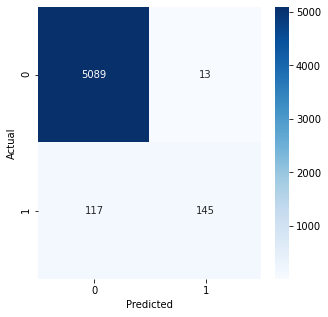

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')


In [ ]:
df.head(2)

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,function,fraudulent,preprocessed_title,preprocessed_location,preprocessed_company_profile,preprocessed_industry,preprocessed_text
0,0,1,0,Other,Internship,Marketing,0,marketing intern,us ny new york,we food52 created groundbreaking award winning...,information technology services,food52 fast growing james beard award winning ...
1,0,1,0,Full-time,Not Applicable,Customer Service,0,customer service cloud video production,nz auckland,90 seconds worlds cloud video production servi...,marketing advertising,organised focused vibrant awesome do passion c...


### Word Cloud of Real job

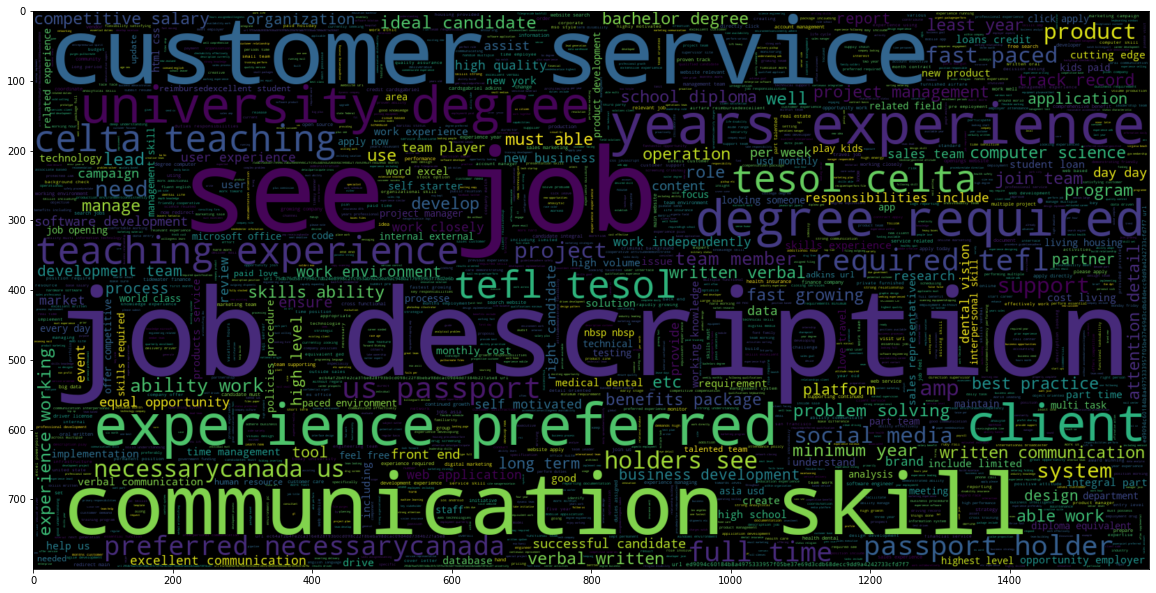

In [ ]:
plt.figure(figsize = (20,20)) # Text that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0].preprocessed_text))
plt.imshow(wc , interpolation = 'bilinear')


### Word Cloud of Fake job

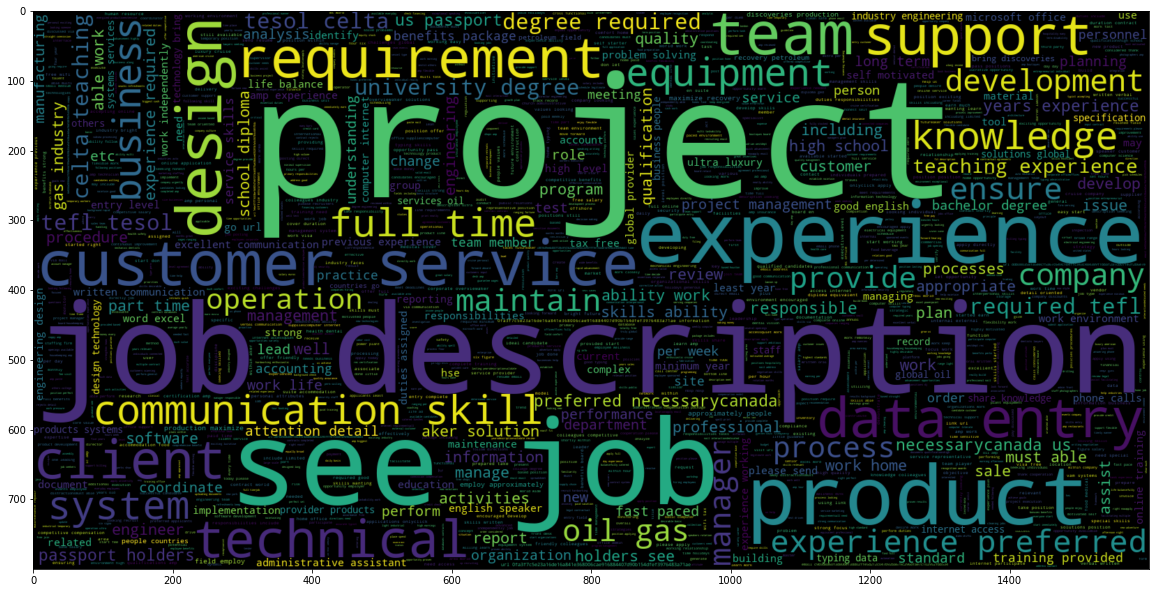

In [ ]:
plt.figure(figsize = (20,20)) # Text that is  fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 1].preprocessed_text))
plt.imshow(wc , interpolation = 'bilinear')


### Deep Learning Model

In [ ]:
#

#from keras.models import Sequential

from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential



model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = X_tr.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1771700   
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,778,296
Trainable params: 1,778,296
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!pip3 install tensorflow-io

     |████████████████████████████████| 20.1MB 165kB/s 
     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 51.6MB/s 
     |████████████████████████████████| 3.9MB 50.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=f914cfdd6b1aab62ccd0dfd491cb2cf93cc1d4eeb88056ed4af9f3e2292e473e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2

In [ ]:
from scipy.sparse import hstack
X_tr=hstack((train_employment_type_one_hot,train_required_experience_one_hot,train_industry_one_hot,train_function_one_hot,telecommuting_normalized_train.T,has_company_logo_normalized_train.T,has_questions_normalized_train.T,train_title_tfidf,train_location_tfidf,train_company_profile_tfidf,train_text_tfidf)).tocsr()
X_te=hstack((test_employment_type_one_hot,test_required_experience_one_hot,test_industry_one_hot,test_function_one_hot,telecommuting_normalized_test.T,has_company_logo_normalized_test.T,has_questions_normalized_test.T,test_title_tfidf,test_location_tfidf,test_company_profile_tfidf,test_text_tfidf)).tocsr()
#X_cv=hstack((cv_state_one_hot,cv_district_one_hot,cv_cropyear_one_hot,cv_crop_one_hot,cv_season_one_hot,Area_normalized_cv.T)).tocsr()

print("Final Data Matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
#print(X_cv.shape, y_cv.shape)


In [ ]:
type(X_tr.todense())

numpy.matrix

In [ ]:
model.fit(X_tr.todense(),y_train , epochs = 5)


Train on 12516 samples
Epoch 1/5
12516/12516 [==============================] - 3s 217us/sample - loss: 0.1017 - accuracy: 0.9680
Epoch 2/5
12516/12516 [==============================] - 2s 162us/sample - loss: 0.0167 - accuracy: 0.9938
Epoch 3/5
12516/12516 [==============================] - 2s 159us/sample - loss: 0.0028 - accuracy: 0.9994
Epoch 4/5
12516/12516 [==============================] - 2s 159us/sample - loss: 0.0014 - accuracy: 0.9997
Epoch 5/5
12516/12516 [==============================] - 2s 158us/sample - loss: 3.2440e-04 - accuracy: 0.9999


In [ ]:

pred_cv = model.predict(X_te.todense())

pred_cv = np.around(pred_cv , decimals = 0)


In [ ]:
accuracy_score(pred_cv,y_test)


0.9867636092468307

<h2> <b> Observation </b> </h2>
<ul>
<li> We use Accuracy as performance measure to determine the performance of model </li>
<li> With the use of Deep Learning Model(MLP Model) we got Accuracy of 98.68% </li>
</ul>

###Confusion Matrix

In [ ]:
cm_cv = confusion_matrix(y_test,pred_cv)

cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'


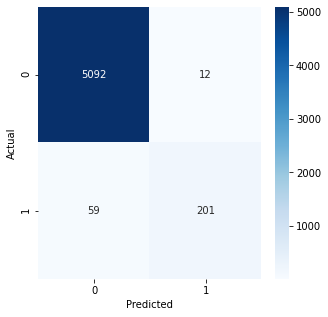

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')


##Results 

In [ ]:
# Please compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Category", "Accuracy"]
x.add_row(["Multinomial NB","Machine Learning",97.58])
x.add_row(["MLP", "Deep Learning",98.68])

print(x)


+----------------+------------------+----------+
|     Model      |     Category     | Accuracy |
+----------------+------------------+----------+
| Multinomial NB | Machine Learning |  97.58   |
|      MLP       |  Deep Learning   |  98.68   |
+----------------+------------------+----------+
